### This is a predictive model for Tip amounts based on coustomer biling and demographic details.

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression,LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:

df = pd.read_csv('tips.csv')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### The problem is to predict the tip amount based on the features provided in the dataset

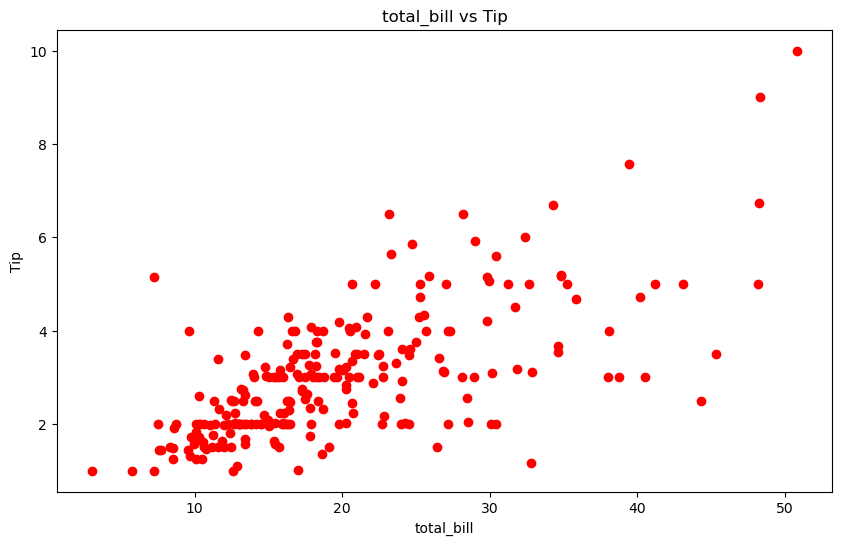

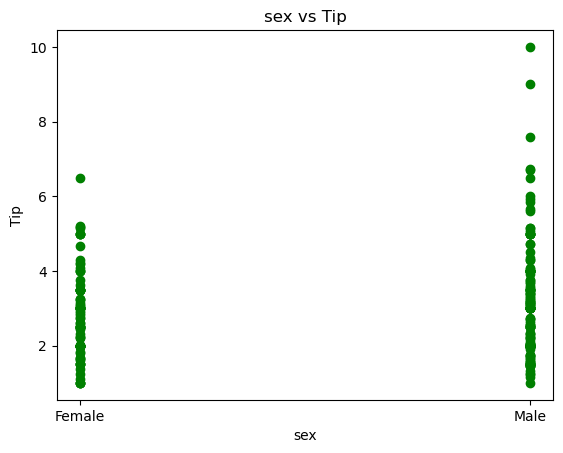

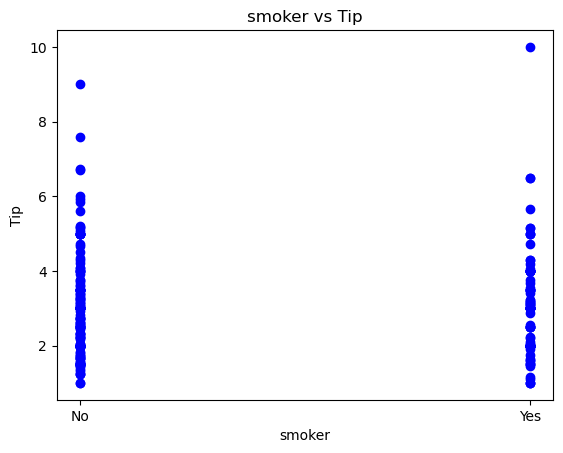

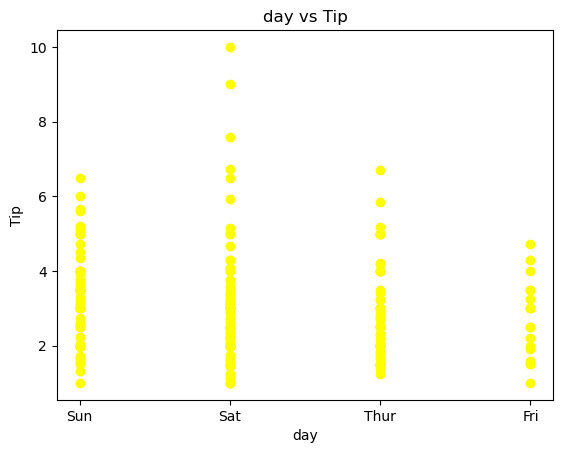

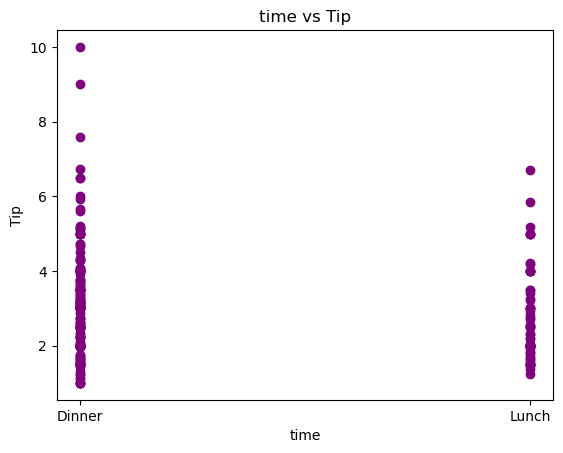

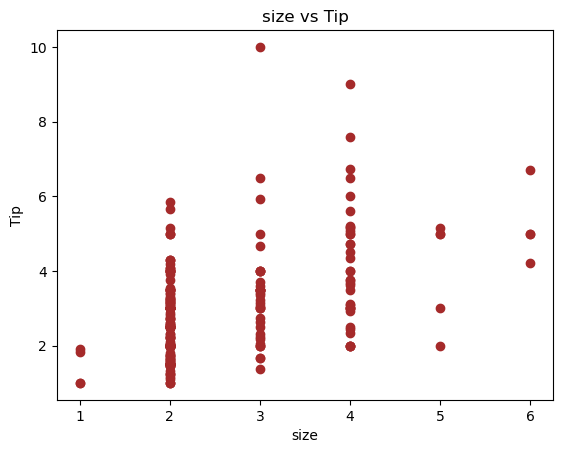

In [5]:
df_data = df.drop(columns=['tip'])
df_target = df['tip']

plt.figure(figsize=(10, 6))
colour=['red','green','blue','yellow','purple','brown']
# Scatter Plot
for i in range(0,6):
    plt.scatter(df_data.iloc[:,i], df_target,color=colour[i])
    plt.xlabel(df_data.columns[i])
    plt.ylabel('Tip')
    plt.title(df_data.columns[i] + ' vs Tip')
    plt.show()


- We notice that a  higher total bill corresponds to a higher amount of tip.
- We also notice that the  average tip amount is higher for the dinner time compared to the lunch time
- the lowest amount of tips are received on Friday
- The highest variance in tips are received on Saturday
- Male customers tip noticably more than female customers do.
- No significant difference in tip between smokers and non smokers.
- Size 4 customers usually pay more tip.

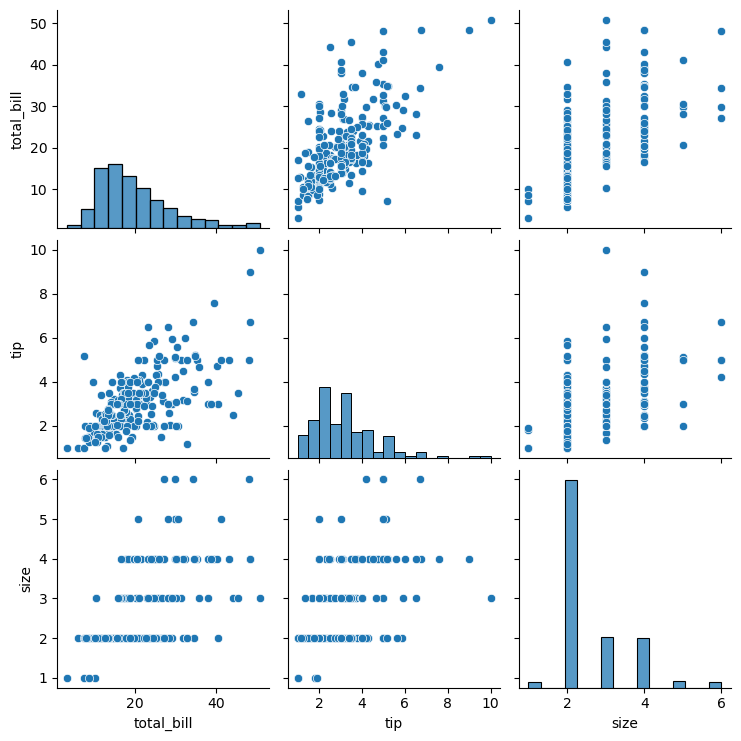

In [10]:
sns.pairplot(df)

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


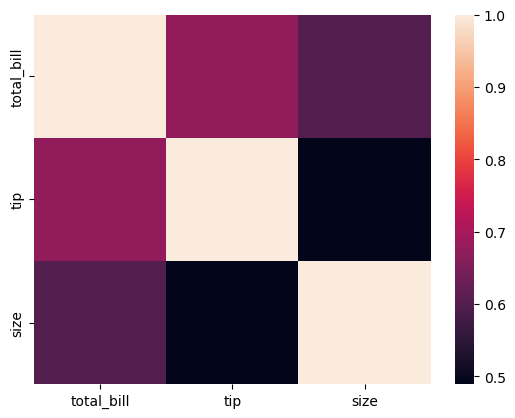

In [13]:
# Convert variable datatypes to get correlation matrix
df_corr = df[['total_bill', 'tip', 'size']].copy()   # store the Numerical variable
corr = df_corr.corr()                                # Find correlation matrix
sns.heatmap(corr)
corr

##### total_bill and size are highly correlated with tip.

In [14]:
label_encoder = LabelEncoder()
df_data['sex'] = label_encoder.fit_transform(df['sex'])
df_data['smoker'] = label_encoder.fit_transform(df['smoker'])
df_data['day'] = label_encoder.fit_transform(df['day'])
df_data['time'] = label_encoder.fit_transform(df['time'])

In [15]:
import statsmodels.api as sm
# Define independent (X) and dependent (y) variables
X = df_data
X = sm.add_constant(X)
y = df_target

# Fit the linear regression model
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.469
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                     34.86
Date:                Sun, 10 Nov 2024   Prob (F-statistic):           4.50e-30
Time:                        13:34:51   Log-Likelihood:                -347.78
No. Observations:                 244   AIC:                             709.6
Df Residuals:                     237   BIC:                             734.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7318      0.262      2.798      0.0

In [16]:
from statsmodels.stats.diagnostic import linear_rainbow

test_stat, p_value = linear_rainbow(model)

print(f"Rainbow Test Statistic: {test_stat}")
print(f"P-value: {p_value}")

Rainbow Test Statistic: 1.2036274510126597
P-value: 0.15798464222013167


### Rainbow test discerns whether a linear model is appropriate even if some underlying relationships are not linear. 
- The null hypothesis is that the regression is correctly modelled as linear.
- If the p-value is less than some threshold (e.g. 0.05), then the null hypothesis is rejected and the alternative hypothesis is accepted.
- If the p-value is greater than some threshold (e.g. 0.05), then the null hypothesis is accepted and the alternative hypothesis is rejected.
- here, we see that the p-value is higher than 0.05, so we accept the null hypothesis and reject the alternative hypothesis. This means that the regression is correctly modelled as linear.

### Residuals will be plotted after every model to check the model performance

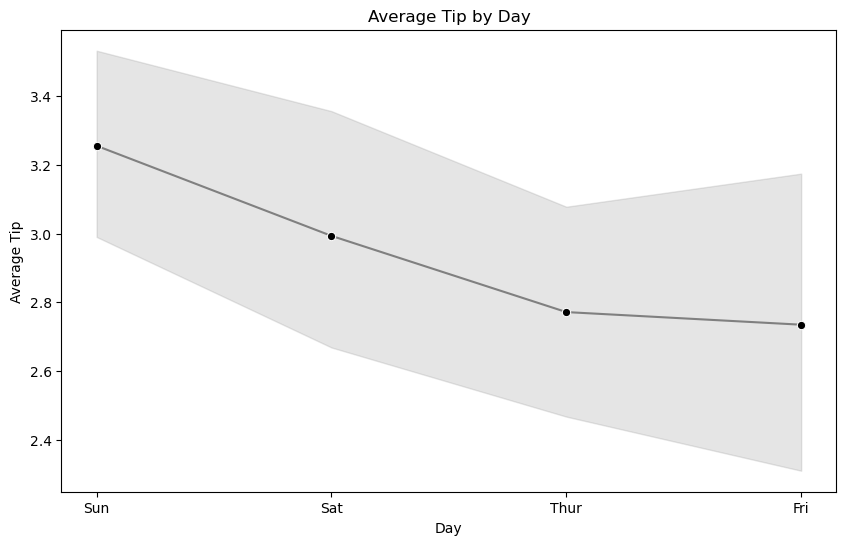

In [23]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x="day", y="tip", estimator="mean", marker="o",color='grey',markerfacecolor='black')
plt.title("Average Tip by Day")
plt.xlabel("Day")
plt.ylabel("Average Tip")
plt.show()


In [30]:
tips_encoded = pd.get_dummies(df, columns=['sex', 'smoker', 'day', 'time'], drop_first=True)
X = tips_encoded.drop(columns='tip')
y = tips_encoded['tip']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Linear regression model

In [31]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lr = lin_reg.predict(X_test)

# Evaluate model
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print("Linear Regression -\nMSE:", mse_lr, "\nR^2:", r2_lr, "\nRMSE:", np.sqrt(mse_lr))


Linear Regression -
MSE: 0.7033566017436103 
R^2: 0.43730181943482516 
RMSE: 0.8386635807900629


#### Ridge Regression model

In [32]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

# Evaluate model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
print("Ridge Regression -\nMSE:", mse_ridge, "\nR^2:", r2_ridge, "\nRMSE:", np.sqrt(mse_ridge))

Ridge Regression -
MSE: 0.7007477213216077 
R^2: 0.4393889716178484 
RMSE: 0.8371067562274287


#### Lasso Regression model

In [33]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

# Evaluate model
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
print("Lasso Regression -\nMSE:", mse_lasso, "\nR^2:", r2_lasso, "\nRMSE:", np.sqrt(mse_lasso))

Lasso Regression -
MSE: 0.5908528649971524 
R^2: 0.5273068720881755 
RMSE: 0.768669542129225


#### Decision Tree Regression model

In [34]:
tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

# Evaluate model
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)
print("Decision Tree -\nMSE:", mse_tree, "\nR^2:", r2_tree, "\nRMSE:", np.sqrt(mse_tree))

Decision Tree -
MSE: 1.2551938775510205 
R^2: -0.004178121600921791 
RMSE: 1.120354353564541


#### Random Forest Regression model

In [35]:
forest = RandomForestRegressor(random_state=42, n_estimators=100)
forest.fit(X_train, y_train)
y_pred_forest = forest.predict(X_test)

# Evaluate model
mse_forest = mean_squared_error(y_test, y_pred_forest)
r2_forest = r2_score(y_test, y_pred_forest)
print("Random Forest -\nMSE:", mse_forest, "\nR^2:", r2_forest, "\nRMSE:", np.sqrt(mse_forest))


Random Forest -
MSE: 0.9196720148979602 
R^2: 0.2642455218065466 
RMSE: 0.9589953153680993


#### Support Vector Regression model

In [36]:
svr = SVR(kernel='linear')
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)

# Evaluate model
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)
print("Support Vector Regression -\nMSE:", mse_svr, "\nR^2:", r2_svr, "\nRMSE:", np.sqrt(mse_svr))

Support Vector Regression -
MSE: 0.6524534436627769 
R^2: 0.47802527943520123 
RMSE: 0.8077459029068342


#### K-Nearest Neighbour

In [37]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Evaluate model
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)
print("K-Nearest Neighbors -\nMSE:", mse_knn, "\nR^2:", r2_knn, "\nRMSE:", np.sqrt(mse_knn))


K-Nearest Neighbors -
MSE: 0.8763725714285714 
R^2: 0.29888587066985495 
RMSE: 0.9361477294896203


Best model is the one with highest R^2 and lowest MSE, so in this case, it is Lasso regression

In [38]:
# Check coefficients in Lasso model for feature importance
feature_importance = pd.Series(lasso.coef_, index=X.columns)
significant_features = feature_importance[feature_importance != 0].sort_values(ascending=False)
print("Significant Factors impacting tips:")
print(significant_features)


Significant Factors impacting tips:
size          0.108081
total_bill    0.099099
dtype: float64


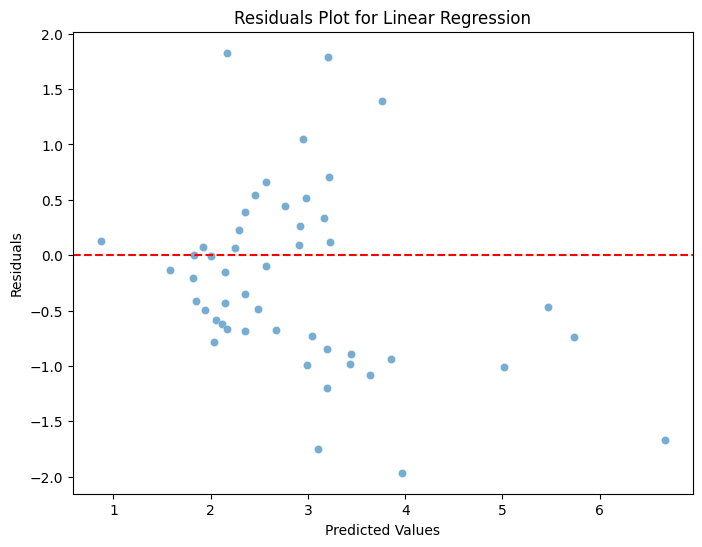

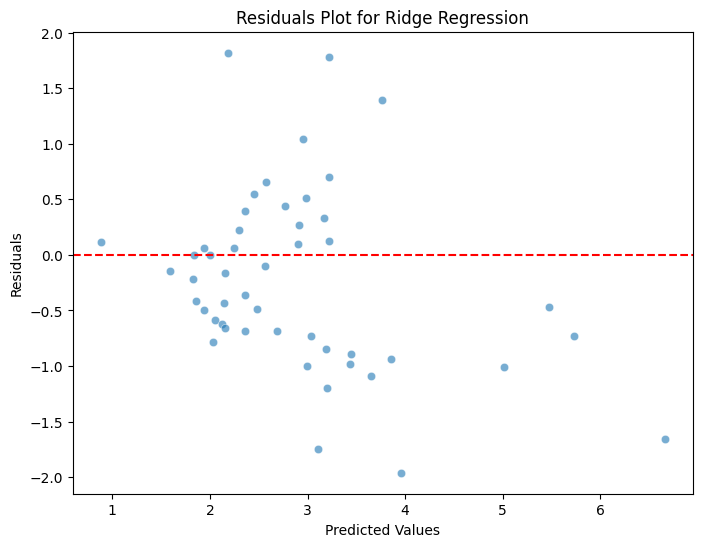

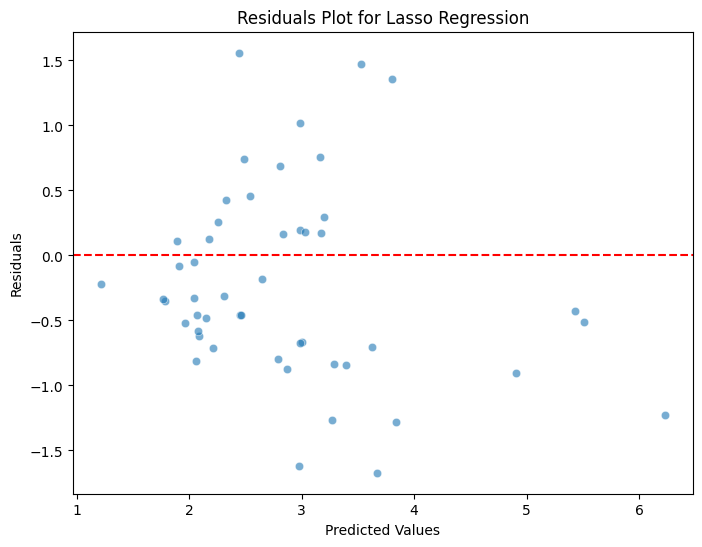

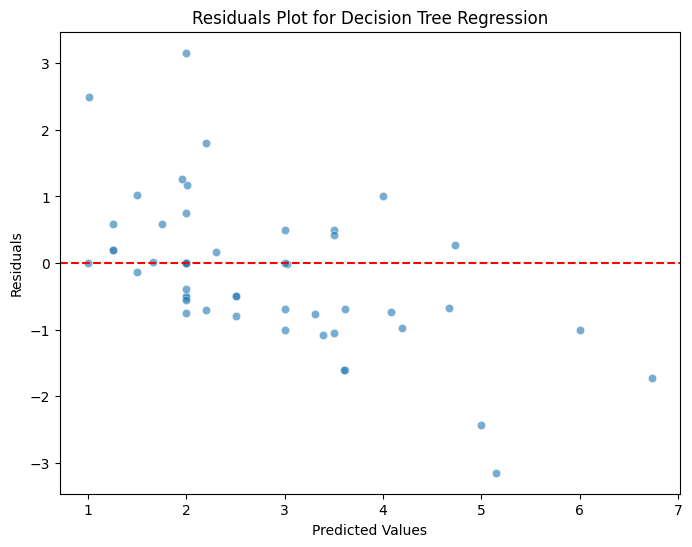

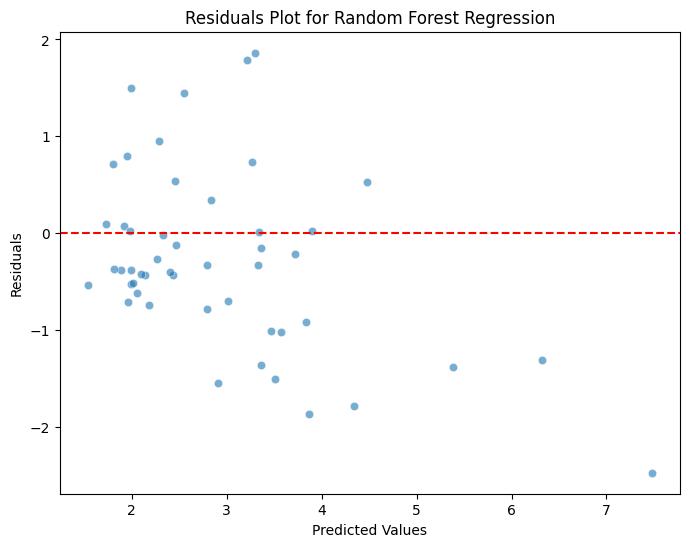

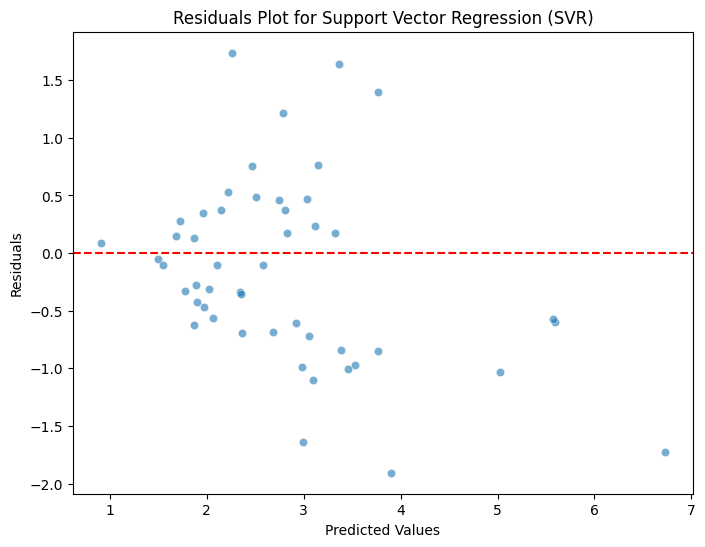

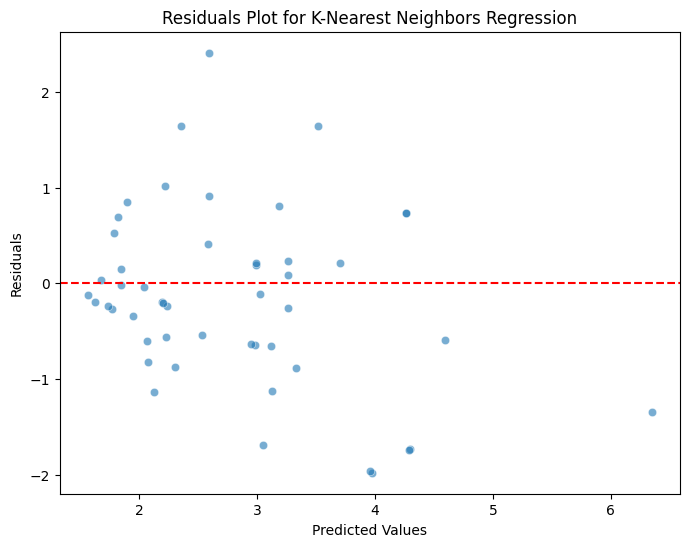

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define a helper function to plot residuals
def plot_residuals(y_test, y_pred, model_name):
    residuals = y_test - y_pred
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals")
    plt.title(f"Residuals Plot for {model_name}")
    plt.show()

# 1. Linear Regression
y_pred_lr = lin_reg.predict(X_test)
plot_residuals(y_test, y_pred_lr, "Linear Regression")

# 2. Ridge Regression
y_pred_ridge = ridge.predict(X_test)
plot_residuals(y_test, y_pred_ridge, "Ridge Regression")

# 3. Lasso Regression
y_pred_lasso = lasso.predict(X_test)
plot_residuals(y_test, y_pred_lasso, "Lasso Regression")

# 4. Decision Tree Regression
y_pred_tree = tree.predict(X_test)
plot_residuals(y_test, y_pred_tree, "Decision Tree Regression")

# 5. Random Forest Regression
y_pred_forest = forest.predict(X_test)
plot_residuals(y_test, y_pred_forest, "Random Forest Regression")

# 6. Support Vector Regression
y_pred_svr = svr.predict(X_test)
plot_residuals(y_test, y_pred_svr, "Support Vector Regression (SVR)")

# 7. K-Nearest Neighbors Regression
y_pred_knn = knn.predict(X_test)
plot_residuals(y_test, y_pred_knn, "K-Nearest Neighbors Regression")


from the above, we notice that desicion tree have the least residuals, which means they might be overfitting the data.

# Insights for Management
1. The business should prioritize delivering top-notch service on Sundays and enhance service quality on Fridays to boost tip rates.

2. Focusing on dinner hours can help increase the tip rate.

3. Tables with a larger number of guests should be given greater attention, as they typically leave higher tips.

4. Emphasizing higher total bill amounts is crucial, given its strong correlation with tip size.